In [ ]:
!pip install torch torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/faceswapping_prj

/content/drive/MyDrive/faceswapping_prj


##Download dataset and orgenizing

In [ ]:
# import torch
# from torchvision import datasets

# # Download and extract the LFW dataset to the "lfw_data" folder
# datasets.utils.download_and_extract_archive(
#     "http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz",
#     "lfw_data",
#     filename="lfw-deepfunneled.tgz",
#     md5="7dcb577b5d2a9d95d985e5e85b1c3d32"
# )


In [ ]:
import torch
from torchvision import utils

def save_image(image, folder_name):
  # Define the file path to save the image to
  file_path = "dataset/" + folder_name + "/image.jpg"

  # Save the image to the specified file path
  utils.save_image(image, file_path, format="JPEG")


 the save_image function takes in an image tensor and a folder name, and saves the image to a folder with the given name in the dataset directory. The image is saved in JPEG format. You can modify this function to save the image in a different format or to use a different file naming convention, if desired.

In [ ]:
# # Import necessary modules
# import torch
# import torchvision
# from torchvision import datasets

# # Load the LFW dataset
# lfw_dataset = datasets.lfw.LFW('lfw_data')


In [ ]:
# import tarfile

# # Open the "lfw-deepfunneled.tgz" archive
# with tarfile.open("/content/lfw_data/lfw-deepfunneled.tgz") as tar:
#   # Extract the contents of the archive to the "lfw_data" folder
#   tar.extractall("/content/lfw_data")


In [ ]:
import torch
from torchvision import datasets

# Load the LFW dataset from the "lfw_data" folder
lfw_dataset = datasets.ImageFolder("./lfw_data/")

# Print the first image and its label
image, label = lfw_dataset[0]
print(image)
print(label)


<PIL.Image.Image image mode=RGB size=250x250 at 0x7F5487B185E0>
0


In [ ]:

import os
import shutil

# Create the "unswapped" directory
os.makedirs("lfw_data/unswapped")


In [ ]:
import os
import shutil

# Iterate through the subfolders of the "lfw_data" directory
for subfolder in os.listdir("/content/lfw_data/lfw-deepfunneled"):
  # Construct the full path to the subfolder
  subfolder_path = os.path.join("/content/lfw_data/lfw-deepfunneled", subfolder)

  # Iterate through the files in the subfolder
  for file in os.listdir(subfolder_path):
    # Construct the full path to the file
    file_path = os.path.join(subfolder_path, file)

    # Copy the file to the "unswapped" directory
    shutil.copy(file_path, "lfw_data/unswapped")


In [ ]:
import torch
from torchvision import datasets

# Load the LFW dataset from the "lfw_data" folder
lfw_dataset = datasets.ImageFolder("/content/lfw_data")

# Print the first image and its label
image, label = lfw_dataset[2]
print(image)
print(label)

<PIL.Image.Image image mode=RGB size=250x250 at 0x7F588A19B5E0>
0


In [ ]:

import cv2
import dlib
from PIL import Image



##preprocessing

In [ ]:
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2022-12-11 19:00:32--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  12.2MB/s    in 8.6s    

2022-12-11 19:00:40 (7.10 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
# !bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


In [ ]:
import cv2

def load_face_image(file_path):
  # Use the cv2.imread function to read the image data from the file
  image = cv2.imread(file_path)

  # Return the image data as a NumPy array
  return image


In [ ]:
# import cv2

# def blend_faces(face1, face2):
#   # Apply blending techniques to the aligned face images
#   blended_face = cv2.addWeighted(face1, 0.5, face2, 0.5, 0)

#   return blended_face


# def align_face(image,desired_landmarks, landmarks):
#   # Use the facial landmarks to align the face image
#   aligned_face = cv2.getAffineTransform(landmarks, desired_landmarks)
#   aligned_face = cv2.warpAffine(image, aligned_face, (image.shape[1], image.shape[0]))

#   return aligned_face

# def align_and_blend_faces(image1, face1_landmarks, image2, face2_landmarks):
#   # Use the facial landmarks to align the faces in the images
#   aligned_face1 = align_face(image1, face1_landmarks,face2_landmarks)
#   aligned_face2 = align_face(image2, face2_landmarks,face1_landmarks)

#   # Apply blending techniques to combine the aligned faces into a single blended face
#   blended_face = blend_faces(aligned_face1, aligned_face2)

#   return blended_face


In [ ]:
# import dlib

# # Create a face detector and a shape predictor
# face_detector = dlib.get_frontal_face_detector()
# shape_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# def detect_face_landmarks(image):
#   # Detect the faces in the image
#   faces = face_detector(image)

#   # Initialize a list to store the detected landmarks
#   landmarks = []

#   # Iterate through the detected faces
#   for face in faces:
#     # Predict the landmarks for the face
#     face_landmarks = shape_predictor(image, face)

#     # Store the landmarks as a list of (x, y) coordinates
#     landmarks.append([(point.x, point.y) for point in face_landmarks.parts()])

#   return landmarks


In [ ]:
# import cv2
# import numpy as np

# def get_dominant_color(image):
#   # Convert the image from BGR to HSV color space
#   hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#   # Define the range of colors to identify
#   lower_color = np.array([0, 0, 0])
#   upper_color = np.array([180, 255, 255])

#   # Use the cv2.inRange function to identify pixels in the image that fall within the specified range of colors
#   mask = cv2.inRange(hsv_image, lower_color, upper_color)

#   # Use the mask to count the number of pixels in each color
#   color_counts = cv2.calcHist([mask], [0], None, [256], [0, 256])

#   # Find the index of the most common color
#   dominant_color_index = color_counts.argmax()

#   # Return the dominant color as a BGR tuple
#   return (dominant_color_index, dominant_color_index, dominant_color_index)


In [ ]:
# import torch
# import torchvision

# # Iterate through the dataset and apply face detection and blending techniques
# def swapface( image ):
#   # Use landmark detection to identify the faces in the image
#   face_landmark = detect_face_landmarks(image)[0]

#   # Use color detection to identify the dominant colors in the image
#   dominant_color = get_dominant_color(image)

#   # Use face blending to swap the faces in the image
#   blended_image = blend_faces(image, face_landmarks, dominant_colors)
#   return blended_image

# import cv2

# def swap_faces(face1, face2):
#   # Use a facial landmark detection model to detect the facial landmarks in the face images
#   face1_landmarks =np.array( detect_face_landmarks(face1)[0])
#   face2_landmarks =np.array( detect_face_landmarks(face2)[0])
#   print(face1_landmarks)

#   # Use the detected facial landmarks to align and blend the face images
#   swapped_face = align_and_blend_faces(face1, face1_landmarks, face2, face2_landmarks)

#   return swapped_face



In [ ]:

# #load libraries 
# !pip install dlib 
# !pip install numpy
# !pip install scipy
# !pip install deepface

#Face swapping for dataset

In [ ]:
import cv2
import dlib
import numpy as np

## Face detection
def face_detection(img,upsample_times=1):
    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    detector = dlib.get_frontal_face_detector()
    faces = detector(img, upsample_times)

    return faces

PREDICTOR_PATH = 'models/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(PREDICTOR_PATH)
## Face and points detection
def face_points_detection(img, bbox:dlib.rectangle):
    # Get the landmarks/parts for the face in box d.
    shape = predictor(img, bbox)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    coords = np.asarray(list([p.x, p.y] for p in shape.parts()), dtype=np.int)

    # return the array of (x, y)-coordinates
    return coords

def select_face(im, r=10, choose=True):
    faces = face_detection(im)

    if len(faces) == 0:
        return None, None, None

    if len(faces) == 1 or not choose:
        idx = np.argmax([(face.right() - face.left()) * (face.bottom() - face.top()) for face in faces])
        bbox = faces[idx]
    else:
        bbox = []

        def click_on_face(event, x, y, flags, params):
            if event != cv2.EVENT_LBUTTONDOWN:
                return

            for face in faces:
                if face.left() < x < face.right() and face.top() < y < face.bottom():
                    bbox.append(face)
                    break

        im_copy = im.copy()
        for face in faces:
            # draw the face bounding box
            cv2.rectangle(im_copy, (face.left(), face.top()), (face.right(), face.bottom()), (0, 0, 255), 1)
        # cv2.imshow('Click the Face:', im_copy)
        cv2.setMouseCallback('Click the Face:', click_on_face)
        while len(bbox) == 0:
            cv2.waitKey(1)
        cv2.destroyAllWindows()
        bbox = bbox[0]

    points = np.asarray(face_points_detection(im, bbox))

    im_w, im_h = im.shape[:2]
    left, top = np.min(points, 0)
    right, bottom = np.max(points, 0)

    x, y = max(0, left - r), max(0, top - r)
    w, h = min(right + r, im_h) - x, min(bottom + r, im_w) - y

    return points - np.asarray([[x, y]]), (x, y, w, h), im[y:y + h, x:x + w]


In [ ]:
#! /usr/bin/env python
import cv2
import numpy as np
import scipy.spatial as spatial
import logging


## 3D Transform
def bilinear_interpolate(img, coords):
    """ Interpolates over every image channel
    http://en.wikipedia.org/wiki/Bilinear_interpolation
    :param img: max 3 channel image
    :param coords: 2 x _m_ array. 1st row = xcoords, 2nd row = ycoords
    :returns: array of interpolated pixels with same shape as coords
    """
    int_coords = np.int32(coords)
    x0, y0 = int_coords
    dx, dy = coords - int_coords

    # 4 Neighour pixels
    q11 = img[y0, x0]
    q21 = img[y0, x0 + 1]
    q12 = img[y0 + 1, x0]
    q22 = img[y0 + 1, x0 + 1]

    btm = q21.T * dx + q11.T * (1 - dx)
    top = q22.T * dx + q12.T * (1 - dx)
    inter_pixel = top * dy + btm * (1 - dy)

    return inter_pixel.T

def grid_coordinates(points):
    """ x,y grid coordinates within the ROI of supplied points
    :param points: points to generate grid coordinates
    :returns: array of (x, y) coordinates
    """
    xmin = np.min(points[:, 0])
    xmax = np.max(points[:, 0]) + 1
    ymin = np.min(points[:, 1])
    ymax = np.max(points[:, 1]) + 1

    return np.asarray([(x, y) for y in range(ymin, ymax)
                       for x in range(xmin, xmax)], np.uint32)


def process_warp(src_img, result_img, tri_affines, dst_points, delaunay):
    """
    Warp each triangle from the src_image only within the
    ROI of the destination image (points in dst_points).
    """
    roi_coords = grid_coordinates(dst_points)
    # indices to vertices. -1 if pixel is not in any triangle
    roi_tri_indices = delaunay.find_simplex(roi_coords)

    for simplex_index in range(len(delaunay.simplices)):
        coords = roi_coords[roi_tri_indices == simplex_index]
        num_coords = len(coords)
        out_coords = np.dot(tri_affines[simplex_index],
                            np.vstack((coords.T, np.ones(num_coords))))
        x, y = coords.T
        result_img[y, x] = bilinear_interpolate(src_img, out_coords)

    return None


def triangular_affine_matrices(vertices, src_points, dst_points):
    """
    Calculate the affine transformation matrix for each
    triangle (x,y) vertex from dst_points to src_points
    :param vertices: array of triplet indices to corners of triangle
    :param src_points: array of [x, y] points to landmarks for source image
    :param dst_points: array of [x, y] points to landmarks for destination image
    :returns: 2 x 3 affine matrix transformation for a triangle
    """
    ones = [1, 1, 1]
    for tri_indices in vertices:
        src_tri = np.vstack((src_points[tri_indices, :].T, ones))
        dst_tri = np.vstack((dst_points[tri_indices, :].T, ones))
        mat = np.dot(src_tri, np.linalg.inv(dst_tri))[:2, :]
        yield mat


def warp_image_3d(src_img, src_points, dst_points, dst_shape, dtype=np.uint8):
    rows, cols = dst_shape[:2]
    result_img = np.zeros((rows, cols, 3), dtype=dtype)

    delaunay = spatial.Delaunay(dst_points)
    tri_affines = np.asarray(list(triangular_affine_matrices(
        delaunay.simplices, src_points, dst_points)))

    process_warp(src_img, result_img, tri_affines, dst_points, delaunay)

    return result_img


## 2D Transform
def transformation_from_points(points1, points2):
    points1 = points1.astype(np.float64)
    points2 = points2.astype(np.float64)

    c1 = np.mean(points1, axis=0)
    c2 = np.mean(points2, axis=0)
    points1 -= c1
    points2 -= c2

    s1 = np.std(points1)
    s2 = np.std(points2)
    points1 /= s1
    points2 /= s2

    U, S, Vt = np.linalg.svd(np.dot(points1.T, points2))
    R = (np.dot(U, Vt)).T

    return np.vstack([np.hstack([s2 / s1 * R,
                                (c2.T - np.dot(s2 / s1 * R, c1.T))[:, np.newaxis]]),
                      np.array([[0., 0., 1.]])])


def warp_image_2d(im, M, dshape):
    output_im = np.zeros(dshape, dtype=im.dtype)
    cv2.warpAffine(im,
                   M[:2],
                   (dshape[1], dshape[0]),
                   dst=output_im,
                   borderMode=cv2.BORDER_TRANSPARENT,
                   flags=cv2.WARP_INVERSE_MAP)

    return output_im


## Generate Mask
def mask_from_points(size, points,erode_flag=1):
    radius = 10  # kernel size
    kernel = np.ones((radius, radius), np.uint8)

    mask = np.zeros(size, np.uint8)
    cv2.fillConvexPoly(mask, cv2.convexHull(points), 255)
    if erode_flag:
        mask = cv2.erode(mask, kernel,iterations=1)

    return mask


## Color Correction
def correct_colours(im1, im2, landmarks1):
    COLOUR_CORRECT_BLUR_FRAC = 0.75
    LEFT_EYE_POINTS = list(range(42, 48))
    RIGHT_EYE_POINTS = list(range(36, 42))

    blur_amount = COLOUR_CORRECT_BLUR_FRAC * np.linalg.norm(
                              np.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
                              np.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    if blur_amount % 2 == 0:
        blur_amount += 1
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)

    # Avoid divide-by-zero errors.
    im2_blur = im2_blur.astype(int)
    im2_blur += 128*(im2_blur <= 1)

    result = im2.astype(np.float64) * im1_blur.astype(np.float64) / im2_blur.astype(np.float64)
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result


## Copy-and-paste
def apply_mask(img, mask):
    """ Apply mask to supplied image
    :param img: max 3 channel image
    :param mask: [0-255] values in mask
    :returns: new image with mask applied
    """
    masked_img=cv2.bitwise_and(img,img,mask=mask)

    return masked_img


## Alpha blending
def alpha_feathering(src_img, dest_img, img_mask, blur_radius=15):
    mask = cv2.blur(img_mask, (blur_radius, blur_radius))
    mask = mask / 255.0

    result_img = np.empty(src_img.shape, np.uint8)
    for i in range(3):
        result_img[..., i] = src_img[..., i] * mask + dest_img[..., i] * (1-mask)

    return result_img


def check_points(img,points):
    # Todo: I just consider one situation.
    if points[8,1]>img.shape[0]:
        logging.error("Jaw part out of image")
    else:
        return True
    return False


def face_swap(src_face, dst_face, src_points, dst_points, dst_shape, dst_img, args, end=48):
    h, w = dst_face.shape[:2]

    ## 3d warp
    warped_src_face = warp_image_3d(src_face, src_points[:end], dst_points[:end], (h, w))
    ## Mask for blending
    mask = mask_from_points((h, w), dst_points)
    mask_src = np.mean(warped_src_face, axis=2) > 0
    mask = np.asarray(mask * mask_src, dtype=np.uint8)
    ## Correct color
    if args.correct_color:
        warped_src_face = apply_mask(warped_src_face, mask)
        dst_face_masked = apply_mask(dst_face, mask)
        warped_src_face = correct_colours(dst_face_masked, warped_src_face, dst_points)
    ## 2d warp
    if args.warp_2d:
        unwarped_src_face = warp_image_3d(warped_src_face, dst_points[:end], src_points[:end], src_face.shape[:2])
        warped_src_face = warp_image_2d(unwarped_src_face, transformation_from_points(dst_points, src_points),
                                        (h, w, 3))

        mask = mask_from_points((h, w), dst_points)
        mask_src = np.mean(warped_src_face, axis=2) > 0
        mask = np.asarray(mask * mask_src, dtype=np.uint8)

    ## Shrink the mask
    kernel = np.ones((10, 10), np.uint8)
    mask = cv2.erode(mask, kernel, iterations=1)
    ##Poisson Blending
    r = cv2.boundingRect(mask)
    center = ((r[0] + int(r[2] / 2), r[1] + int(r[3] / 2)))
    output = cv2.seamlessClone(warped_src_face, dst_face, mask, center, cv2.NORMAL_CLONE)

    x, y, w, h = dst_shape
    dst_img_cp = dst_img.copy()
    dst_img_cp[y:y + h, x:x + w] = output

    return dst_img_cp


In [ ]:
import cv2
import dlib
import numpy as np

## Face detection
def face_detection(img,upsample_times=1):
    # Ask the detector to find the bounding boxes of each face. The 1 in the
    # second argument indicates that we should upsample the image 1 time. This
    # will make everything bigger and allow us to detect more faces.
    detector = dlib.get_frontal_face_detector()
    faces = detector(img, upsample_times)

    return faces

PREDICTOR_PATH = 'models/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(PREDICTOR_PATH)
## Face and points detection
def face_points_detection(img, bbox:dlib.rectangle):
    # Get the landmarks/parts for the face in box d.
    shape = predictor(img, bbox)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    coords = np.asarray(list([p.x, p.y] for p in shape.parts()), dtype=np.int)

    # return the array of (x, y)-coordinates
    return coords

def select_face(im, r=10, choose=True):
    faces = face_detection(im)

    if len(faces) == 0:
        return None, None, None

    if len(faces) == 1 or not choose:
        idx = np.argmax([(face.right() - face.left()) * (face.bottom() - face.top()) for face in faces])
        bbox = faces[idx]
    else:
        bbox = []

        def click_on_face(event, x, y, flags, params):
            if event != cv2.EVENT_LBUTTONDOWN:
                return

            for face in faces:
                if face.left() < x < face.right() and face.top() < y < face.bottom():
                    bbox.append(face)
                    break

        # im_copy = im.copy()
        # for face in faces:
        #     # draw the face bounding box
        #     cv2.rectangle(im_copy, (face.left(), face.top()), (face.right(), face.bottom()), (0, 0, 255), 1)
        # cv2.imshow('Click the Face:', im_copy)
        # cv2.setMouseCallback('Click the Face:', click_on_face)
        # while len(bbox) == 0:
        #     cv2.waitKey(1)
        # cv2.destroyAllWindows()
        # bbox = bbox[0]
        bbox = faces[0]

    points = np.asarray(face_points_detection(im, bbox))

    im_w, im_h = im.shape[:2]
    left, top = np.min(points, 0)
    right, bottom = np.max(points, 0)

    x, y = max(0, left - r), max(0, top - r)
    w, h = min(right + r, im_h) - x, min(bottom + r, im_w) - y

    return points - np.asarray([[x, y]]), (x, y, w, h), im[y:y + h, x:x + w]


In [ ]:

import cv2
from google.colab.patches import cv2_imshow



class Foo(object):
      pass
args = Foo()
args.correct_color = True
args.warp_2d = False
#setattr(args, 'correct_color', True)


def swap_faces(img1, img2):
  src_img = img1 #cv2.imread(img1)
  dst_img = img2 #cv2.imread(img2)
  # Select src face
  src_points, src_shape, src_face = select_face(src_img)
  dst_points, dst_shape, dst_face = select_face(dst_img)
  print(args.correct_color)
  output = face_swap(src_face, dst_face, src_points, dst_points, dst_shape, dst_img, args)
  # cv2_imshow(src_img)
  # cv2_imshow(dst_img)
  # cv2_imshow(output)
  return output

In [ ]:

import cv2
from google.colab.patches import cv2_imshow



class Foo(object):
      pass
args = Foo()
args.correct_color = True
args.warp_2d = False
#setattr(args, 'correct_color', True)


def swap_faces(img1, img2):
  src_img = img1 #cv2.imread(img1)
  dst_img = img2 #cv2.imread(img2)
  # Select src face
  src_points, src_shape, src_face = select_face(src_img)
  dst_points, dst_shape, dst_face = select_face(dst_img)
  print(args.correct_color)
  output = face_swap(src_face, dst_face, src_points, dst_points, dst_shape, dst_img, args)
  # cv2_imshow(src_img)
  # cv2_imshow(dst_img)
  # cv2_imshow(output)
  return output

import os
import cv2

def save_image(image, file_path):
  # Use the cv2.imwrite function to save the image to the specified file
  cv2.imwrite(file_path, image)


# Set the path to the folder containing the unswapped dataset
dataset_path = '/content/lfw_data/unswapped'

# Use the os.listdir function to list the files in the folder
file_list = os.listdir(dataset_path)

# Split the list of files into two lists
file_list1 = file_list[:len(file_list)//2]
file_list2 = file_list[len(file_list)//2:]

# Iterate over the two lists of files
for file1, file2 in zip(file_list1, file_list2):
  # Load the face images
  face1 = load_face_image(os.path.join(dataset_path, file1))
  face2 = load_face_image(os.path.join(dataset_path, file2))
  try:
    # Apply the face swapping code to the face images
    swapped_face1 = swap_faces(face1, face2)
    swapped_face2 = swap_faces(face2, face1)
    if swapped_face1.any() :
      # Save the swapped face images to the swapped faces folder
      save_image(swapped_face1, '/content/lfw_data/swapped_faces/'+file1)
    if swapped_face2.any() :
      save_image(swapped_face2, '/content/lfw_data/swapped_faces/'+file2)
  except:
    pass

<ipython-input-95-653cd04b5f13>:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  coords = np.asarray(list([p.x, p.y] for p in shape.parts()), dtype=np.int)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


#Face Swapping detection

In [ ]:
# !rm -r /content/lfw_data/lfw-deepfunneled
# !rm  /content/lfw_data/lfw-deepfunneled.tgz
# !rm -r /content/lfw_data/.ipynb_checkpoints

In [ ]:
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
# Load the LFW dataset from the "lfw_data" folder
data = datasets.ImageFolder("/content/lfw_data")


In [ ]:


# # Create the ORB descriptor
# orb = cv2.ORB_create()
# # Get the labels for the data
# labels = data.classes
# print(labels)

# # Extract ORB features from the LFW faces
# features = []
# for face,label in data:
#     keypoints, descriptors = orb.detectAndCompute( np.array(face)s, None)
#     features.append(descriptors)

# # Create a bag of words model to represent the image in a more compact and effective manner
# bow_model = nn.Sequential(
#     nn.Linear(128, 64),
#     nn.ReLU(),
#     nn.Linear(64, 32),
#     nn.ReLU(),
#     nn.Linear(32, 16)
# )

# # Use the bag of words model to transform the ORB features into a compact representation
# bow_features = bow_model(torch.Tensor(features))

# # Create a model for recognizing swapped faces
# class FaceSwapRecognizer(nn.Module):
#     def __init__(self, num_classes):
#         super().__init__()
#         self.num_classes = num_classes
#         self.fc1 = nn.Linear(16, 8)
#         self.fc2 = nn.Linear(8, 4)
#         self.fc3 = nn.Linear(4, num_classes)
    
#     def forward(self, x):
#         x = self.fc1(x)
#         x = nn.ReLU()(x)
#         x = self.fc2(x)
#         x = nn.ReLU()(x)
#         x = self.fc3(x)
#         return x

# # Initialize the face swap recognizer model
# model = FaceSwapRecognizer(num_classes=len(data))

# # Define the loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Train the model on the LFW face dataset
# # Train the model for a number of epochs
# num_epochs = 10
# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model(bow_features)
#     loss = criterion(outputs, labels)
    
#     # Backward and optimize
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     if (epoch+1) % 5 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:

# # Load the ground truth labels for the test data
# test_labels = ...

# # Calculate the accuracy of the model on the test data
# accuracy = (predicted == test_labels).sum().item() / len(test_labels)
# print(f'Accuracy of the model on the test data: {accuracy:.2%}')




# # Load the test dataset
# test_data = ...

# # Extract ORB features from the test faces
# test_features = []
# for face in test_data:
#     keypoints, descriptors = orb.detectAndCompute(face, None)
#     test_features.append(descriptors)

# # Transform the test features using the bag of words model
# test_bow_features = bow_model(torch.Tensor(test_features))

# # Make predictions on the test data using the trained model
# with torch.no_grad():
#     outputs = model(test_bow_features)
#     _, predicted = torch.max(outputs.data, 1)

# # Print the predictions
# print(predicted)



# import matplotlib.pyplot as plt

# # Calculate the classification error for each class
# class_errors = []
# for c in range(model.num_classes):
#     class_mask = (test_labels == c)
#     class_errors.append((predicted[class_mask] != c).sum().item() / class_mask.sum())

# # Plot the classification error for each class
# plt.figure()
# plt.bar(range(model.num_classes), class_errors)
# plt.xlabel('Class')
# plt.ylabel('Classification Error')
# plt.show()



# import matplotlib.pyplot as plt

# # Collect the training and validation loss and accuracy for each epoch
# train_losses = []
# train_accuracies = []
# val_losses = []
# val_accuracies = []

# # Train the model for a number of epochs
# num_epochs = 10
# for epoch in range(num_epochs):
#     # Forward pass on the training data
#     train_outputs = model(bow_features)
#     train_loss = criterion(train_outputs, labels)
    
#     # Calculate the training accuracy
#     _, train_predicted = torch.max(train_outputs.data, 1)
#     train_accuracy = (train_predicted == labels).sum().item() / len(labels)
#     train_losses.append(train_loss.item())
#     train_accuracies.append(train_accuracy)
    
#     # Forward pass on the validation data
#     val_outputs = model(val_bow_features)
#     val_loss = criterion(val_outputs, val_labels)
    
#     # Calculate the validation accuracy
#     _, val_predicted = torch.max(val_outputs.data, 1)
#     val_accuracy = (val_predicted == val_labels).sum().item() / len(val_labels)
#     val_losses.append(val_loss.item())
#     val_accuracies.append(val_accuracy)
    
#     # Backward and optimize
#     optimizer.zero_grad()
#     train_loss.backward()
#     optimizer.step()
    
# # Create two subplots for the training and validation loss and accuracy
# fig, axs = plt.subplots(2, 2, figsize=(8,8))
# axs[0,0].plot(train_losses, label='Training Loss')
# axs[0,0].plot(val_losses, label='Validation Loss')
# axs[0,0].set_title('Loss')
# axs[0,1].plot(train_accuracies, label='Training Accuracy')
# axs[0,1].plot(val_accuracies, label='Validation Accuracy')
# axs[0,1].set_title('Accuracy')


# plt.show()




In [ ]:

# Modified from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import time
import os
import sys
import copy
from skimage import io, transform

plt.ion()   # interactive mode


In [ ]:
# pip install split-folders
#split folders 
import splitfolders
splitfolders.ratio("./lfw_data", output="./dataset", seed=123, ratio=(0.7,0.2,0.1), group_prefix = None )
train_dir = './dataset/train/'
test_dir = './dataset/test/'
val_dir = './dataset/test/'

Copying files: 14097 files [09:52, 23.78 files/s]


In [ ]:
class FaceFaceDataset(Dataset):
    """FaceFace dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Path to the root directory.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        
        self.images = []
        # for m in ['autoencoder', 'pipeline']:
        for tp in ['unswapped', 'swapped_faces']:
                working_dir = os.path.join(root_dir, tp)
                for f in os.listdir(working_dir):
                    # if os.path.isdir(os.path.join(working_dir, fd)):
                    #     for f in os.listdir(os.path.join(working_dir, fd)):
                    if not f.startswith('.') and f.endswith('jpg'):
                            if tp == 'unswapped':
                                    self.images.append((working_dir+ '/' + f, 1))
                            else:
                                    self.images.append((working_dir+ '/' + f, 0))
        
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = io.imread(self.images[idx][0])
        
        if self.transform:
            image = F.to_pil_image(image)
            image = self.transform(image)
        target   = self.images[idx][1]
        return (image, target, self.images[idx][0])


In [ ]:
transformed_train_dataset =FaceFaceDataset(root_dir='./dataset/train',
                                      transform=transforms.Compose([
                                            transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                           ]))

transformed_val_dataset =FaceFaceDataset(root_dir='./dataset/test',
                                      transform=transforms.Compose([
                                            transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])                          
                                           ]))


     

In [ ]:
dataloader_train = DataLoader(transformed_train_dataset, batch_size=16,
                        shuffle=True, num_workers=8)
dataloader_val = DataLoader(transformed_val_dataset, batch_size=16,
                        shuffle=True, num_workers=8)

dataset_sizes = {'train': len(transformed_train_dataset), 'val': len(transformed_val_dataset)}
dataloaders = {'train': dataloader_train, 'val': dataloader_val}

# dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
# class_names = transformed_train_dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(dataset_sizes)



False
{'train': 200, 'val': 200}


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


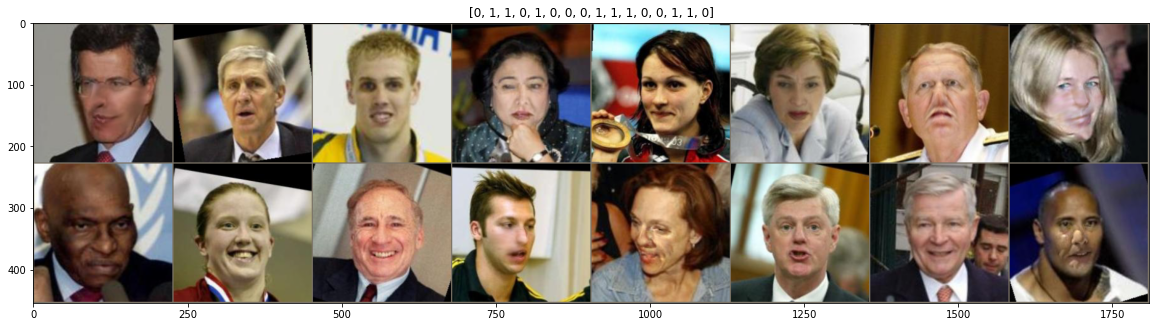

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,16))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes, file_names = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[x.item() for x in classes])
# print(file_names)


In [ ]:
def log_data(preds, actual_labels, names, epoch):
    with open(str(epoch) + '_preds.txt', 'a') as the_file:
        lo = ''
        for i, p in enumerate(preds):
            lo = str(p.item()) + ',' + str(actual_labels[i].item()) + ',' + str(names[i])
            the_file.write(lo + '\n')
        
def log_raw(outputs, actual_labels, names, epoch, itr_run=0):
    with open(str(itr_run) + '_' + str(epoch) + '_outputs.txt', 'a') as the_file:
        lo = ''
        for i, o in enumerate(outputs):
            lo = str(actual_labels[i].item()) + ',' +  str(o[0].item()) + ',' + str(o[1].item()) + ',' + str(names[i])
            the_file.write(lo + '\n')


def train_model(model, criterion, optimizer, scheduler, num_epochs=25, itr_run=0):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            i = 0
            for inputs, labels, files in dataloaders[phase]:
                i = i + 1
                if i % 1000 == 0:
                    print('Epoch {}/{}: {}/{} '.format(epoch, num_epochs - 1, i, len(dataloaders[phase])))
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                    else: # Write ouput to file
                        log_data(preds, labels.data, files, epoch)
                        log_raw(outputs, labels.data, files, epoch, itr_run)
                        

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model



In [ ]:

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#taining 
ts = time.time()
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=2, itr_run=ts)


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:

ts = time.time()
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=2, itr_run=ts)



Epoch 0/1
----------


/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


train Loss: 0.7578 Acc: 0.4450
val Loss: 0.6325 Acc: 0.6450

Epoch 1/1
----------
train Loss: 0.5350 Acc: 0.7850
val Loss: 0.4097 Acc: 0.8700

Training complete in 2m 8s
Best val Acc: 0.870000


## using ORB for detection

In [ ]:
# import torchvision.transforms as transforms
# from PIL import Image

# # Read the image
# img =image.item()

# # define a transform to convert the image to grayscale
# transform = transforms.Grayscale()

# # apply the above transform on the image
# img = transform(img)

In [ ]:
def modify_descriptors(descriptors, n, action='add'):
    if action == 'add':
        # Create a 2D array of shape (n, 32) with all elements set to 0
        zeros = np.zeros((n, 32))

        # Concatenate the array of zeros with the descriptors along the first axis
        descriptors = np.concatenate([descriptors, zeros])
    elif action == 'remove':
        # Get the number of keypoints detected in the image
        num_keypoints = descriptors.shape[0]

        # Select the last n keypoints and their descriptors
        selected_keypoints = np.arange(num_keypoints - n, num_keypoints)
        selected_descriptors = descriptors.take(selected_keypoints, axis=0)

        # Delete the selected keypoints and their descriptors from the array
        descriptors = np.delete(descriptors, selected_keypoints, axis=0)

    return np.concatenate(descriptors)


In [ ]:
# Import the necessary modules
import numpy as np
import cv2

# Initialize the ORB algorithm
orb = cv2.ORB_create()

# Create an empty matrix to store the feature vectors for the images
# This matrix will have one row for each image, and the same number
# of columns as the length of the descriptors for each keypoint
feature_vectors =[]# np.zeros((len(transformed_train_dataset), orb.descriptorSize()))

# # Iterate over the images in the dataset
# for i, (image, target, file_path) in enumerate(transformed_train_dataset):
# Initialize an empty list to store the labels
labels = []

# Iterate over the images in the dataset
for i, (image, target, file_path) in enumerate(transformed_train_dataset):
    # Get the label for this image and append it to the list of labels
    label = target
    labels.append(label)
    # Convert the image tensor to a NumPy array
    img = cv2.imread(file_path) # image.numpy() # np.array(image)

    # Convert the image to grayscale
    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the keypoints and compute their descriptors
    keypoints, descriptors = orb.detectAndCompute(image_gray, None)

    # If the number of keypoints detected is less than the maximum number of keypoints,
    # add a flat array of shape 32 to the descriptors to make sure all the vectors have the same dimensions
    if descriptors.shape[0] < len(transformed_train_dataset):
        descriptors = modify_descriptors(descriptors, len(transformed_train_dataset) - descriptors.shape[0] )  #np.concatenate([descriptors, np.zeros((orb.descriptorSize() - descriptors.shape[0], 32))])
    else: 
        descriptors = modify_descriptors(descriptors, descriptors.shape[0] - len(transformed_train_dataset)  ,'remove' )  #np.concatenate([descriptors, np.zeros((orb.descriptorSize() - descriptors.shape[0], 32))])

    # Store the descriptors as the feature vector for this image
    feature_vectors.append(descriptors)


In [ ]:
accuracy

1.0

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the feature vectors into inputs (X) and targets (y)
X = feature_vectors
y = np.array([target for (_, target, _) in transformed_train_dataset])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Train a support vector machine classifier on the training data
clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.47      0.96      0.63        24
           1       0.00      0.00      0.00        26

    accuracy                           0.46        50
   macro avg       0.23      0.48      0.32        50
weighted avg       0.23      0.46      0.30        50

